In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
plt.style.use('seaborn-whitegrid')

## Рассматриваем семейство функций:

$
1 - e^{-a \cdot \big(\frac{t}{b} - c\big)^{m+1}}
$

#### Попробуем манипулировать коэффициентом a

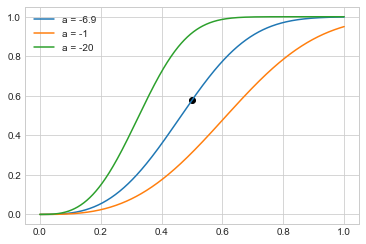

In [6]:
ox = np.linspace(0, 1, 500)
oy = 1 - np.e**(-6.9 * (ox)**(2+1))
oy1 = 1 - np.e**(-3 * (ox)**(2+1))
oy2 = 1 - np.e**(-20 * (ox)**(2+1))

# Хотим, скажем, чтобы семейство функций проходило через определенну ниже точку 
p_y = 1 - np.e**(-6.9 * (0.5)**(2+1))
p_x = [0.5]

plt.plot(p_x, p_y, marker = 'o', color = 'black')

plt.plot(ox, oy, label = "a = -6.9")
plt.plot(ox, oy1, label = "a = -1")
plt.plot(ox, oy2, label = "a = -20")

plt.plot()

plt.legend()
plt.show()

Как видим из графиков, коэффициент при экспоненте (-6.9 взят за оригинал, как в 56-й формуле) отвечает за растяжимость функции. Короче становятся все три участка при увеличении а по модулю

#### Попробуем манипулировать коэффициентом m

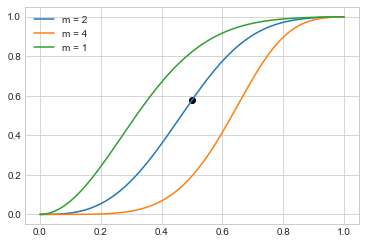

In [7]:
ox = np.linspace(0, 1, 500)
oy = 1 - np.e**(-6.9 * (ox)**(2+1))
oy1 = 1 - np.e**(-6.9 * (ox)**(4+1))
oy2 = 1 - np.e**(-6.9 * (ox)**(2))

# Хотим, чтобы семейство функций проходило через определенну ниже точку 
p_y = 1 - np.e**(-6.9 * (0.5)**(2+1))
p_x = [0.5]

plt.plot(p_x, p_y, marker = 'o', color = 'black')

plt.plot(ox, oy, label = "m = 2")
plt.plot(ox, oy1, label = "m = 4")
plt.plot(ox, oy2, label = "m = 1")

plt.plot()

plt.legend()
plt.show()

Коэффициент m отвечает за "выгибаемость". Длина участков такая же, но рост при меньшем m менее явный

Двигать по фазе нехорошо - уедет (0,0). 

## Вывод:

Если мы хотим, чтобы наша функция проходила через 0, через 1, да еще и через зафиксированную точку, нам придется одновременно манипулировать и сжатием (a), и степенью (m). 

#### Предлагаю рассмотреть аналог функции Лапласа: https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B0%D0%BF%D0%BB%D0%B0%D1%81%D0%B0

Сссылки нормально пока не научился тут вставлять

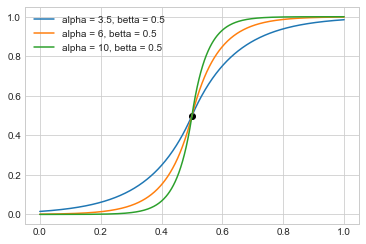

In [8]:
ox = np.linspace(0, 1, 500)

# Laplace
def func(x, alpha, betta):
    return ( (1 + np.sign(x - betta))/2 - np.sign(x - betta)*1./2*np.exp(-np.sign(x - betta)*alpha*2*(x - betta)) )
#    if (x<= betta):
#        return ( 1./2*np.exp(alpha*(x - betta)) )
#    else:
#        return (1 - 1./2*np.exp(-alpha*(x - betta)))

    
oy = func(ox, 3.5, 0.5)#1 - 1./2*np.e**(-0.5 * (ox - 0.5)**(1))
oy1 = func(ox, 6, 0.5)#1 - 1./2*np.e**(-1 * (ox - 0.5)**(1))
oy2 = func(ox, 10, 0.5)#1 - 1./2*np.e**(-7 * (ox - 0.5)**(1))

# Хотим, скажем, чтобы семейство функций проходило через определенну ниже точку 
p_y = 1 - 1/2*np.e**(-6.9 * (0.)**(1))
p_x = [0.5]

plt.plot(p_x, p_y, marker = 'o', color = 'black')

plt.plot(ox, oy, label = "alpha = 3.5, betta = 0.5")
plt.plot(ox, oy1, label = "alpha = 6, betta = 0.5")
plt.plot(ox, oy2, label = "alpha = 10, betta = 0.5")

plt.plot()

plt.legend()
plt.show()

График симметричен, фиксируем интересующую нас точку с помощью параметра $\beta$, за крутизну отвечает $\alpha$  и, соответственно, за скорость в зафикисрованной точке

Не знаю, подойдет ли для расчетов такая функция, по условию мне показалось, что от нее может быть толк. Из минусов, следует учитывать, что и в нуле, и в единице, она лишь стремится к заданным значениям (0 и 1) - не достигает их

## Гауссовая кривая

[Нормальное распределение](http://www.machinelearning.ru/wiki/index.php?title=Нормальное_распределение)

Само уравнение задается формулой:

$$
\frac{1}{\sigma\sqrt{2\pi}}\int\limits_{-\infty}^{x}exp\bigg( -\frac{(t-\mu)^2}{2\sigma^2} \bigg) dt
$$

Зато на графике выглядит, кажется, неплохо:

In [9]:
import scipy.integrate as integrate

In [10]:
def density(t, mu, sigma_sq):
    return (np.exp(-(t - mu)**2/(2*sigma_sq)))
                  
def func_Gauss(list_of_x, mu, sigma_sq):
    #func = lambda t: density(t, mu, sigma_sq)
    res = []
    for x in list_of_x:
        res.append(1./( sigma_sq**(0.5) *(2*np.pi)**(0.5)) * integrate.quad(density, -np.inf, x, args =(mu, sigma_sq))[0] )
    return res
#    return (1./( 1.**(0.5) *(2*np.pi)**(0.5) * integrate.quad(density, -np.inf, x, args =(0, 1))[0]) )



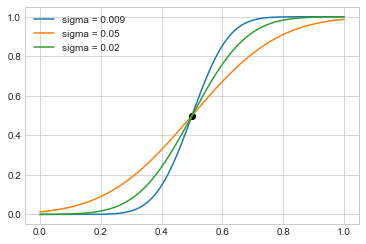

In [11]:
ox = np.linspace(0., 1, 500)

# Gauss

oy = func_Gauss(ox, 0.5, 0.009)
oy1 = func_Gauss(ox, 0.5, 0.05)
oy2 = func_Gauss(ox, 0.5, 0.02)


plt.plot(0.5, 0.5, marker = 'o', color = 'black')

plt.plot(ox, oy, label = "sigma = 0.009")
plt.plot(ox, oy1, label = "sigma = 0.05")
plt.plot(ox, oy2, label = "sigma = 0.02")

plt.plot()

plt.legend()
plt.show()

Ну вот, кстати, по форме мог бы подойти, кажется? Но формула тут сложнее

По умолчанию выбрана точка (0.5, 0.5), как та, через которую должно проходить семейство графиков.

Скорость изменения функции в этой точке равна

$$
\frac{1}{\sigma\sqrt{2\pi}} \cdot exp\bigg( -\frac{(x-\mu)^2}{2\sigma^2} \bigg)
$$

Параметр $\mu$ отвечает за сдвиг, чтобы манипулировать скоростью в этой точке, будем изменять $\sigma$.

Допустим, хотим задать сами скорость. Ниже функция для определения $\sigma^2$

In [16]:
def determine_sigma_sq(v):
    return ( 1./( v * (2*np.pi)**(0.5) ) )**2

__Введите скорость в точке 0.5 $\quad v|_{x = 0.5}$__

In [30]:
v = 2.5

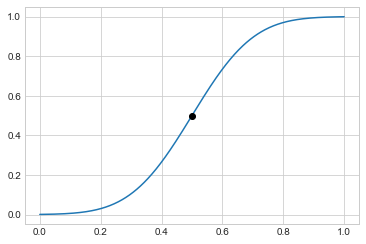

In [31]:
sigma_sq_cust = determine_sigma_sq(v)
ox = np.linspace(0., 1, 500)

# Gauss

oy = func_Gauss(ox, 0.5, sigma_sq_cust)

plt.plot(ox, oy)
plt.plot(0.5, 0.5, marker = 'o', color = 'black')

plt.plot()
plt.show()

### Сплайн

Точки (0,0), (0.25, 0.25), (0.5, 0.5), (0.75, 0.75), (1,1)

In [32]:
p0 = (0., 0.)
p1 = (0.25, 0.25)
p2 = (0.5, 0.5)
p3 = (0.75, 0.75)
p4 = (1., 1.)

$S_3(x) = \frac{(x_{i+1} - x)^2 (2(x-x_i) + h)}{h^3}f_i + 
\frac{(x - x_i)^2 (2(x_{i+1}-x) + h)}{h^3}f_{i+1} + 
\frac{(x_{i+1} - x)^2 (x-x_i)}{h^2}m_i + 
\frac{(x - x_i)^2 (x-x_{i+1})}{h^2}m_{i+1}$

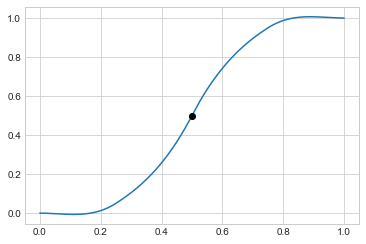

In [101]:
def S3(list_of_x, list_of_nodes, list_of_f_i, list_of_m_i):
    res = []
    num = 0
    a,b = 0., 0.
    for x in list_of_x:
        for i, xi in enumerate(list_of_nodes): # Находим, между каких узлов x 
            if (xi < x) & (list_of_nodes[i+1] < x):
                continue
            else:
                a, b = list_of_nodes[i], list_of_nodes[i+1]
                num = i
                break
        res.append ( (b - x)**2 * (2*(x - a) + (b - a) ) * list_of_f_i[num] / (b - a)**3 +\
                    (x - a)**2 * (2*(b - x) + (b - a) ) * list_of_f_i[num + 1] / (b - a)**3 +
                    (b - x)**2 * (x - a) * list_of_m_i[num] / (b - a)**2 +
                    (x - a)**2 * (x - b) * list_of_m_i[num+1] / (b - a)**2 )
    return res

# Здесь задаем значения

list_of_nodes = [0., 0.25, 0.5, 0.75, 1.]
list_of_f_i = [0., 0.05, 0.5, 0.95, 1.]
list_of_m_i = [0., 1., 3., 1., 0.]


# Строим график

ox = np.linspace(0., 1, 500)

oy = S3(ox, list_of_nodes, list_of_f_i, list_of_m_i)

plt.plot(ox, oy)
plt.plot(0.5, 0.5, marker = 'o', color = 'black')

plt.plot()
plt.show()


Видим нечто подобное. 

Как это работает: 

1. Подаем на вход:
    - список узлов (здесь у меня их 5: 0, 0.25, 0.5, 0.75, 1.)...
    - список значений в узлах (я задавал 0 и 1 для первого и последнего узла соответственно, 0.5 для третьего - центрального)
    - список скоростей функции в узлах 
2. Программа подбирает уравнение кубического сплайна, выдает график

_Минусы:_

1. Узлы задаем с равным интервалом, значения вбиваем с учетом симметрии
2. Узлов 5 штук, следовательно, график очень гибко настраиваемый, поэтому подбирать коэффициенты приходится аккуратно, иначе может получиться как на рисунке

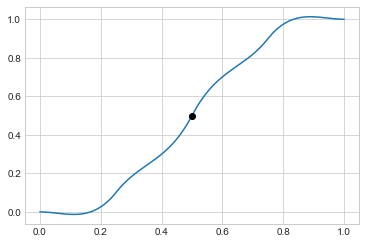

In [102]:
list_of_nodes = [0., 0.25, 0.5, 0.75, 1.]
list_of_f_i = [0., 0.1, 0.5, 0.9, 1.]
list_of_m_i = [0., 2., 3., 2., 0.]


ox = np.linspace(0., 1, 500)

oy = S3(ox, list_of_nodes, list_of_f_i, list_of_m_i)

plt.plot(ox, oy)
plt.plot(0.5, 0.5, marker = 'o', color = 'black')

plt.plot()
plt.show()

